### Problem Statement:
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

#Importing DataCleaning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform 

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib


In [2]:
#Loading Dataset
sales = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv', sep = ',')
#sales.head()

In [3]:
#Dropping Unnecessary column
sales.drop('Unnamed: 0', axis = 1, inplace = True)

### About Dataset : 


In [4]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


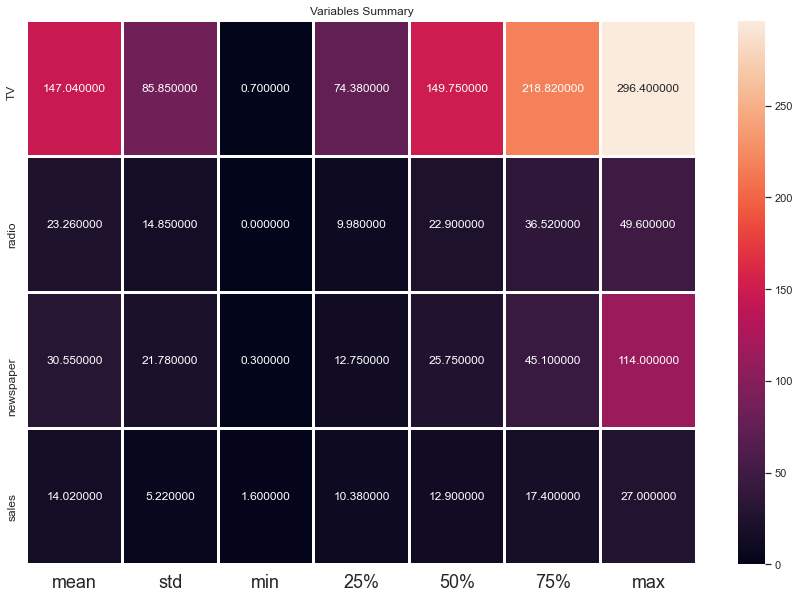

In [5]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(sales.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("Variables Summary")
plt.show()

In [6]:
sales.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
sales.duplicated().sum()

0

### Exploratory Data Analysis

In [8]:
#Correlation Table
correlation = sales.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- TV and sales have high positive correlation
- Newspaper and sales have low correlation

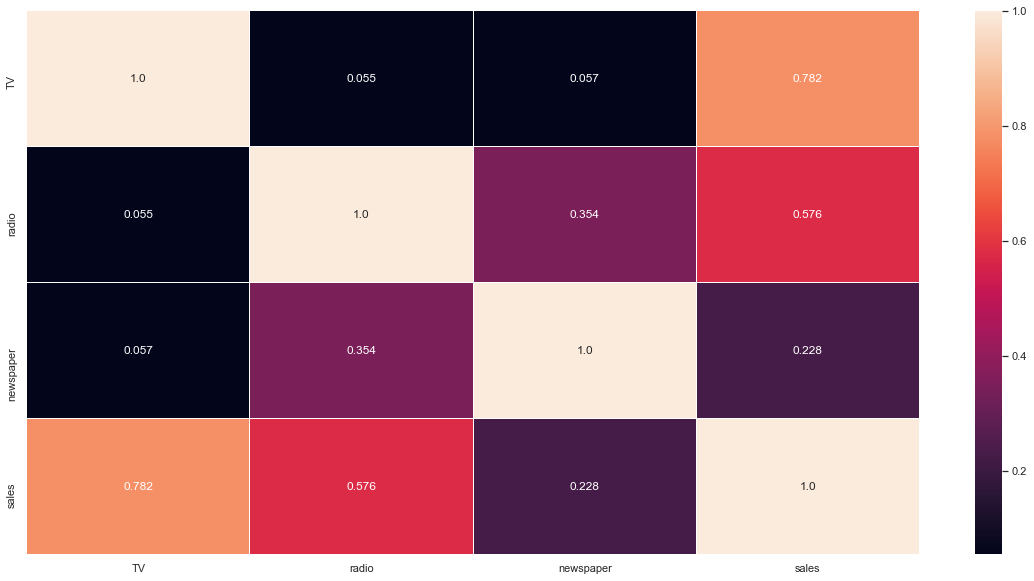

In [9]:
#Multivariate Analysis
#Checking Correlation among features
plt.figure(figsize = (20,10))
sns.heatmap(round(correlation,3), annot = True, linewidth = .2 , fmt = '1')
plt.show()

- TV and sales have high positive correlation
- Newspaper and sales have low correlation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

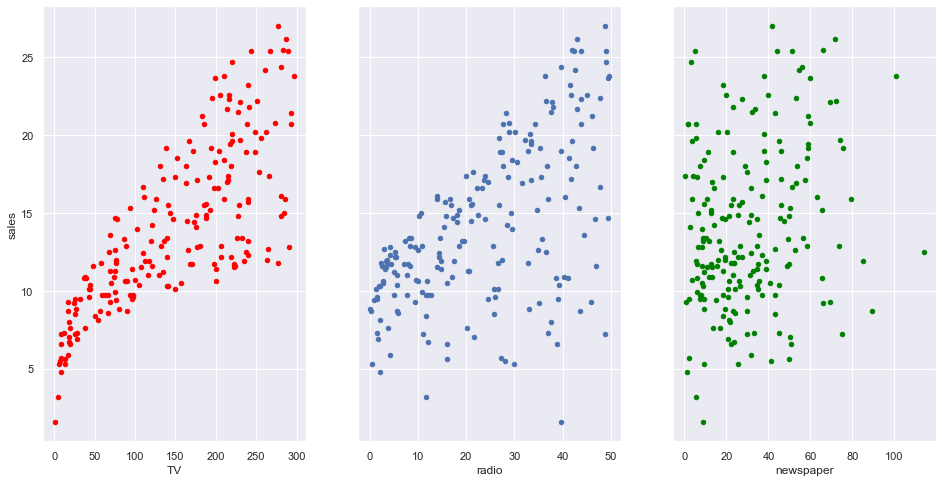

In [10]:
#Multivariate Analysis
#Visualising Correlation of features and Targets

fig, axs = plt.subplots(1,3, sharey = True)

sales.plot(kind = 'scatter', x = 'TV', y = 'sales', ax=axs[0], figsize = (16,8), color = 'red')
sales.plot(kind = 'scatter', x = 'radio', y = 'sales', ax=axs[1])
sales.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax=axs[2], color = 'green')


- TV and sales have high positive correlation
- radio and sales have moderate correlation
- Newspaper and sales have low correlation

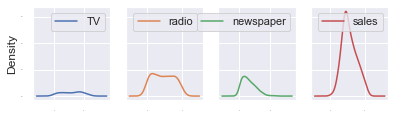

In [11]:
#Visualizing Normal distribution and dispersion of columns using density graph
#Multivariate Analysis
sales.plot(kind='density',subplots=True,layout=(6,11), sharex = False, legend = True, fontsize = 1, figsize=(18,12), sharey = True)
plt.show()

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

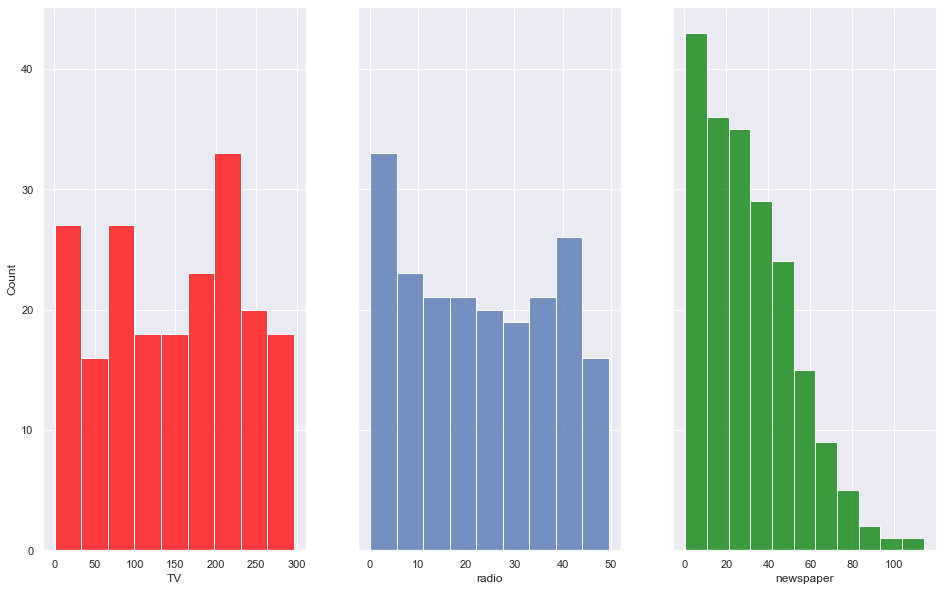

In [12]:
#Visualizing Normal distribution and dispersion of columns using histogram
#Multivariate Analysis

fig, ax = plt.subplots(1,3, sharey = True, figsize = (16,10))

sns.histplot(sales['TV'], ax = ax[0], color = 'red')
sns.histplot(sales['radio'], ax = ax[1])
sns.histplot(sales['newspaper'], ax = ax[2], color = 'green')

- Seems like newspaper have right skew.

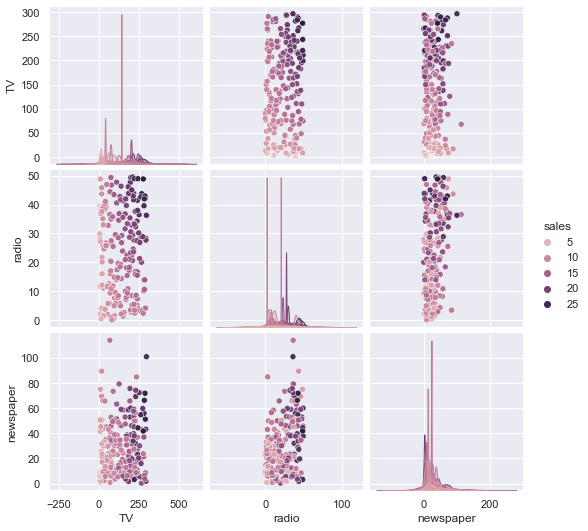

In [13]:
#Multivariate Analysis
#plotting relationship in between features and between feature and target variable
sns.pairplot(data = sales, hue = 'sales')

- newspaper have low sales as compared to radio and TV

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

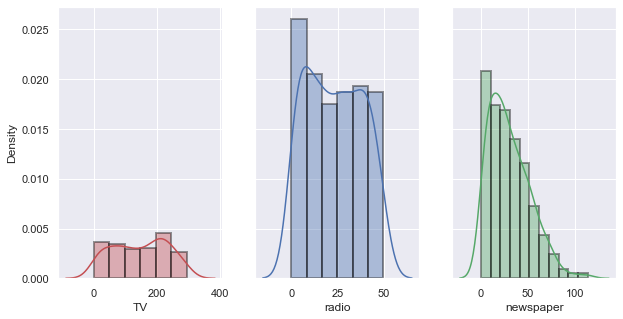

In [14]:
#Visualizing Normal distribution and dispersion of columns using histogram
#Multivariate Analysis

fig, ax = plt.subplots(1,3, sharey = True, figsize = (10,5))


sns.distplot(sales['TV'], color = 'r', ax = ax[0], hist_kws=dict(edgecolor="black", linewidth=2))
sns.distplot(sales['radio'], ax = ax[1], hist_kws=dict(edgecolor="black", linewidth=2))
sns.distplot(sales['newspaper'], color = 'g', ax = ax[2], hist_kws=dict(edgecolor="black", linewidth=2))


-  Seems like newspaper have right skewness.

<AxesSubplot:xlabel='sales', ylabel='Density'>

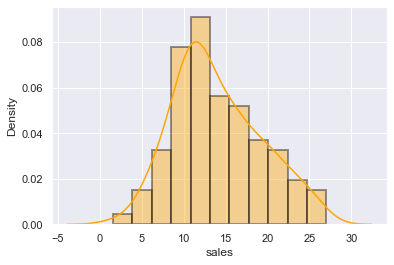

In [15]:
#Univariate Analysis
#Visualising distribution of target variable.
sns.distplot(sales['sales'], color = 'orange',hist_kws=dict(edgecolor="black", linewidth=2))


In [16]:
#Checking Skewness
sales.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:>

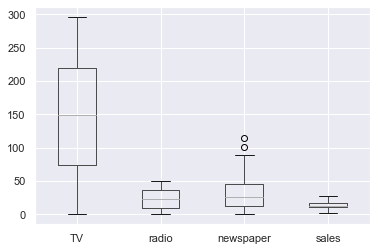

In [17]:
#Visualising Skewness using boxplot
sales.boxplot()

- newspaper have outliers.

In [18]:
#Removing skewness in newspaper column using square root transformation
sales['newspaper'] = np.sqrt(sales['newspaper'])

In [19]:
#Checking skewness after treating it.
sales.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

<AxesSubplot:>

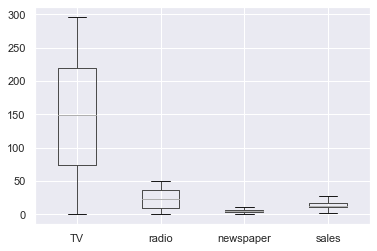

In [20]:
#Visualising skewness again with boxplot
sales.boxplot()

In [21]:
#Splitting Dataset into features and target variable

X = sales.drop('sales',axis = 1)
y = sales['sales']

#### Scaling Data

In [22]:
scaler = StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

In [24]:
#Splitting our Scaled data into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y , test_size = 0.25)

### Linear Regression

In [25]:
#Model instantiating and fitting
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [26]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  88.51 %
Linear Regression Model Confidence on training set :  92.51 %


In [27]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [28]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  13.930659786008613 

Features and their corresponding weights:


,features,coefficients
0,TV,4.020251
1,radio,2.656045
2,newspaper,0.021938


In [29]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.9251421512059909
Mean Absolute Error for our Linear Regression Model: 1.1553272700590298
Mean Squared Error for our Linear Regression Model: 1.9390425578798236
Root Mean Squared Error for our Linear Regression Model: 1.3924950836106473


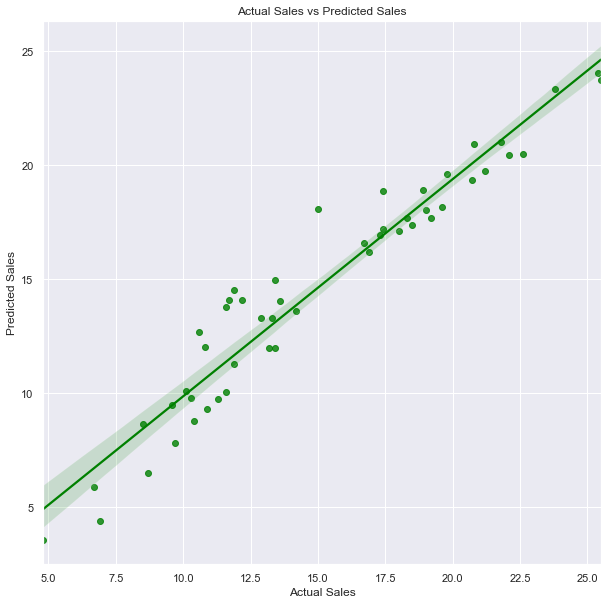

In [30]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X_scaled, color = 'green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

In [31]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(lm,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 87.2 %


### Ordinary Least Squares (OLS)

In [32]:
#Performing OLS model on all three

lm = smf.ols(formula = 'sales~ TV + radio + newspaper',data = sales).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.2
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           1.59e-96
Time:                        00:29:45   Log-Likelihood:                -386.19
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8931      0.387      7.483      0.000       2.131       3.656
TV             0.0458      0.001     32.808      0.000       0.043       0.049
radio          0.1877      0.008     22.127      0.000       0.171       0.204
newspaper      0.0069      0.062      0.112      0.911      -0.115       0.129
==============================================================================
Omnibus:                       59.761   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.047
Skew:                          -1.321   Prob(JB):                     1.17e-32
Kurtosis:                       6.266   Cond. No.                         559.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Newspaper have high p value. pvalue is higher than alpha. 

In [33]:
#Performing OLS model on all TV and Radio

lm1 = smf.ols(formula = 'sales~ TV + radio',data = sales).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           4.83e-98
Time:                        00:29:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Tv and Radio advertisement comprises of most of the increement in sales.

In [34]:
#Performing OLS model on only Newspaper

lm2 = smf.ols(formula = 'sales~ newspaper',data = sales).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     8.662
Date:                Sun, 18 Jul 2021   Prob (F-statistic):            0.00364
Time:                        00:29:45   Log-Likelihood:                -609.41
No. Observations:                 200   AIC:                             1223.
Df Residuals:                     198   BIC:                             1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3296      0.984     11.514      0.000       9.389      13.270
newspaper      0.5239      0.178      2.943      0.004       0.173       0.875
==============================================================================
Omnibus:                        7.116   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.310
Skew:                           0.362   Prob(JB):                       0.0426
Kurtosis:                       2.517   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
lm3 = smf.ols(formula = 'sales~ radio',data = sales).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           4.35e-19
Time:                        00:29:45   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- radio only constitues a little percentage in model prediction.

In [36]:
#Performing OLS model on TV

lm4 = smf.ols(formula = 'sales~ TV',data = sales).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        00:29:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- TV advertisements Alone can constitute upto 60% of the sales.

### Lasso Regularization

In [37]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.007776279185645336

In [38]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.007776279185645336)

In [39]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  92.5 %


In [40]:
lassopred = lasso_reg.predict(X_test)

In [41]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R2 Score for Tuned Lasso Regression Model: 0.9250928134259515
Mean Absolute Error for our Tuned Lasso Regression Model: 1.156297133495453
Mean Squared Error for our Tuned Lasso Regression Model: 1.9403205541988302
Root Mean Squared Error for our Lasso Linear Regression Model: 1.3929538952165037


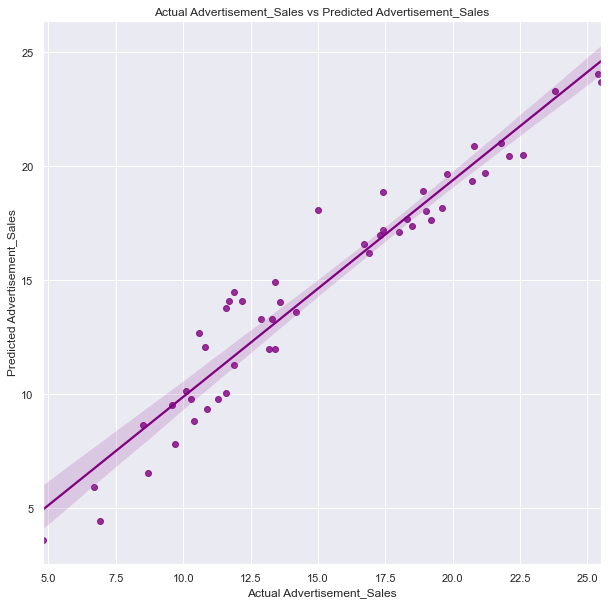

In [42]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=lassopred,data=X_scaled, color = 'purple')
plt.xlabel('Actual Advertisement_Sales')
plt.ylabel('Predicted Advertisement_Sales')
plt.title('Actual Advertisement_Sales vs Predicted Advertisement_Sales')
plt.show()

In [43]:
score = cross_val_score(lasso_reg,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 87.2 %


#### Ridge Regularization

In [44]:
#Ridge will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas= np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [45]:
ridgecv.alpha_

0.001

In [46]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [47]:
ridge_model.score(X_test,y_test)

0.9251422019086796

In [48]:
ridgepred = ridge_model.predict(X_test)

In [49]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,ridgepred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,ridgepred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,ridgepred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,ridgepred)))

R2 Score for Tuned Ridge Regression Model: 0.9251422019086796
Mean Absolute Error for our Tuned Ridge Regression Model: 1.155330932008668
Mean Squared Error for our Tuned Ridge Regression Model: 1.93904124452828
Root Mean Squared Error for our Ridge Linear Regression Model: 1.392494612028456


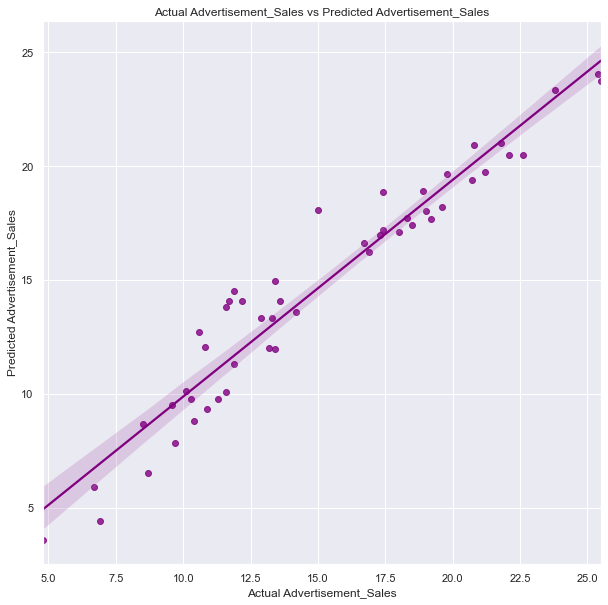

In [50]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=ridgepred,data=X_scaled, color = 'purple')
plt.xlabel('Actual Advertisement_Sales')
plt.ylabel('Predicted Advertisement_Sales')
plt.title('Actual Advertisement_Sales vs Predicted Advertisement_Sales')
plt.show()

# Hyperparameter Tuning of Linear Regression Model

In [51]:
#Instanstiating Parameters
parameters = {'fit_intercept':[True, False],
 "normalize":[True, False],
 "copy_X":[True, False],
 "positive":[True, False]
 }
cvInstance = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = "r2")

In [52]:
#fitting grid model with suggested parameters
cvInstance.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [53]:
#Finding best params
cvInstance.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': True}

In [54]:
lm1 = LinearRegression(copy_X = 'True',fit_intercept = 'True', normalize = 'True', positive = 'False')

In [55]:
lm1.fit(X_train,y_train)

LinearRegression(copy_X='True', fit_intercept='True', normalize='True',
                 positive='False')

In [56]:
lmpred = lm1.predict(X_test)
#Applying Evaluation metrics to our Tuned Linear Regression model
print('R2 Score for Tuned Linear Regression Model:', r2_score(y_test,lmpred))
print('Mean Absolute Error for our Tuned Linear Regression Model:',mean_absolute_error(y_test,lmpred))
print('Mean Squared Error for our Tuned Linear Regression Model:',mean_squared_error(y_test,lmpred))
print('Root Mean Squared Error for our Tuned Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lmpred)))

R2 Score for Tuned Linear Regression Model: 0.9251421512059909
Mean Absolute Error for our Tuned Linear Regression Model: 1.15532727005903
Mean Squared Error for our Tuned Linear Regression Model: 1.9390425578798232
Root Mean Squared Error for our Tuned Linear Regression Model: 1.392495083610647


In [57]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm1.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on training set : ",round(lm1.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  88.51 %
Linear Regression Model Confidence on training set :  92.51 %


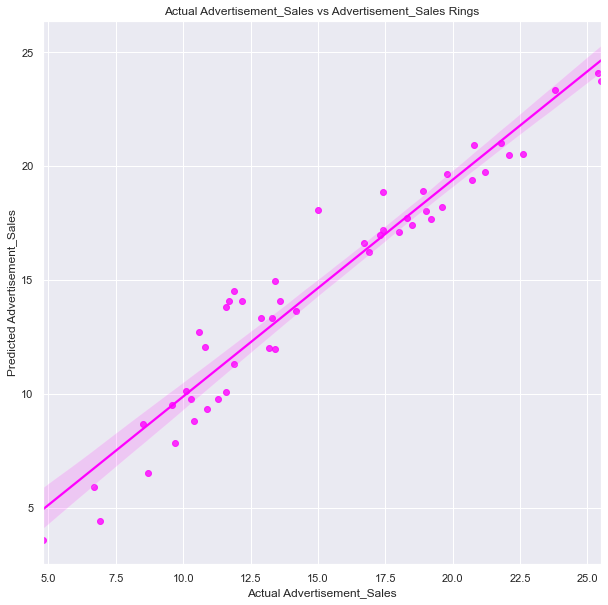

In [58]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'magenta')
plt.xlabel('Actual Advertisement_Sales')
plt.ylabel('Predicted Advertisement_Sales')
plt.title('Actual Advertisement_Sales vs Advertisement_Sales Rings')
plt.show()

In [59]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(lm1,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 87.2 %


In [60]:
#Using Randomized Search
param_grid = {'alpha': uniform()}

rand_search = RandomizedSearchCV(estimator=lasso_reg, 
                            param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train,y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

0.09261620024205452
0.8738176016499539


In [61]:
pred = rand_search.predict(X_test)

In [62]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Tuned Lasso Regression Model: 0.923624116782372
Mean Absolute Error for our Tuned Lasso Regression Model: 1.1804647463587683
Mean Squared Error for our Tuned Lasso Regression Model: 1.9783641974826842
Root Mean Squared Error for our Lasso Linear Regression Model: 1.4065433507299674


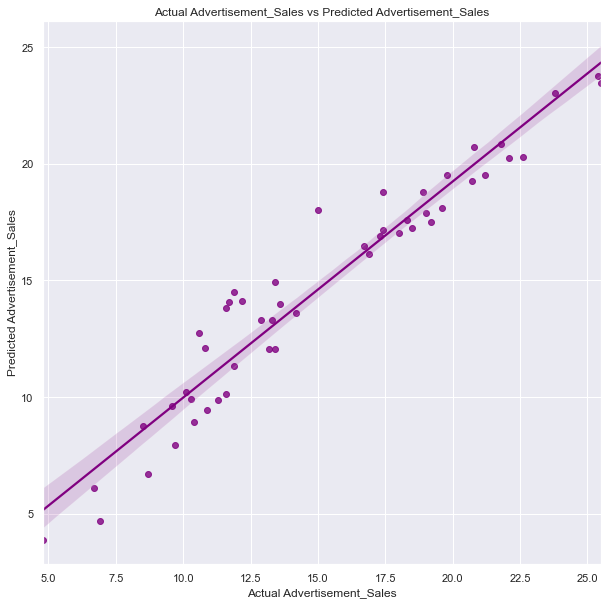

In [63]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=pred,data=X, color = 'purple')
plt.xlabel('Actual Advertisement_Sales')
plt.ylabel('Predicted Advertisement_Sales')
plt.title('Actual Advertisement_Sales vs Predicted Advertisement_Sales')
plt.show()

__Conclusion__ : Lasso Regression model without hyperparameter tuning is giving us best r2_score. Hence forth, we will use Lasso as our final Model for prediction.

### Saving Model

In [64]:
joblib.dump(lasso_reg,"AdvertisementSalesAnalysis.pkl")

['AdvertisementSalesAnalysis.pkl']

### Loading Model

In [65]:
model = joblib.load("AdvertisementSalesAnalysis.pkl")

##### Performing Predictions on X_test 

In [66]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = model.predict(X_test)
prediction = pd.DataFrame(prediction)
prediction

,0
0,21.000261
1,13.612907
2,14.081757
3,19.720555
4,19.367683
5,17.105151
6,16.591962
7,23.705035
8,12.062122
9,3.623396


In [67]:
#Converting the saved file into .csv format
prediction.to_csv('Results.csv',index = False)